# Script for smartpca visualisation in R

## Before you begin

In [ ]:
install.packages("tidyverse")

## Visualisation

Saving 6.67 x 6.67 in image


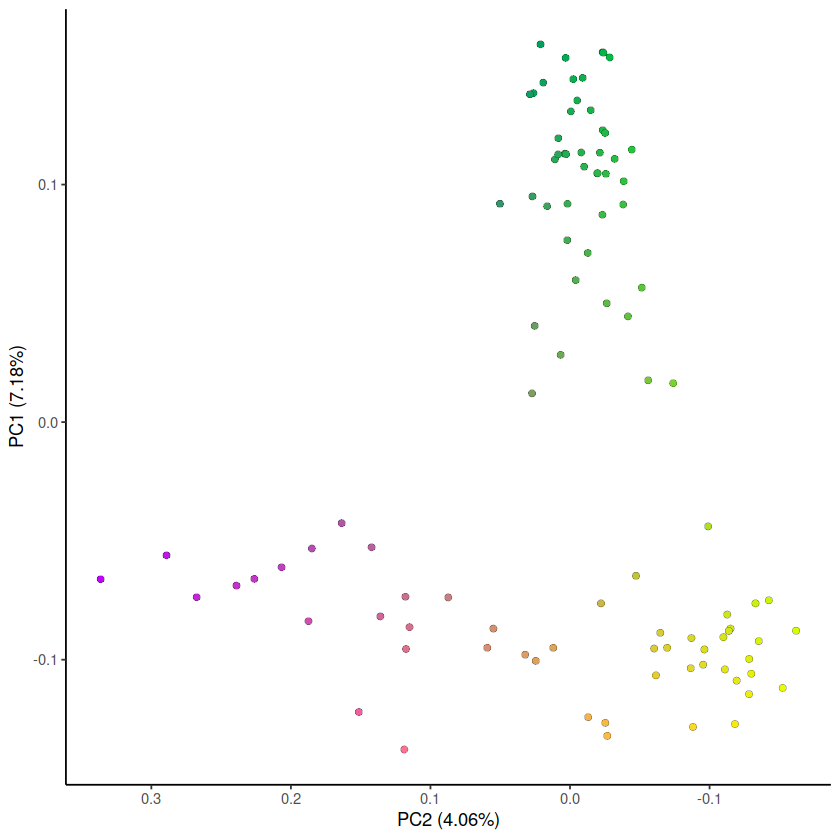

In [4]:
library(tidyverse)

setwd("../..")

pca <- read.table("results/3.smartpca/saimaa_20_phased_posmask.evec")
eig <- read.table("results/3.smartpca/saimaa_20_phased_posmask.eval")

colnames(pca)[2:11] <- paste0("PC",1:10)

e1 <- round(100*eig$V1[1]/sum(eig$V1),2)
e2 <- round(100*eig$V1[2]/sum(eig$V1),2)

m3 <- min(pca$PC1)
c3 <- max(pca$PC1)-m3
m4 <- min(pca$PC2)
c4 <- max(pca$PC2)-m4

pca$Color <- rgb(
  red=  1-(pca$PC1-m3)/c3, 
  green=1-(pca$PC2-m4)/c4, 
  blue=   (pca$PC2-m4)/c4)

colors <- cbind(pca$V1, pca$Color)

write.table(colors, "results/3.smartpca/colors.txt",row.names=F,quote=T, col.names=F, sep = "\t")

pca_plot <- ggplot(pca)+
  geom_point(aes(PC2,PC1,fill=I(Color)),size=2,shape=21,stroke=.1)+
  xlab(paste0("PC2 (",e2,"%)"))+ylab(paste0("PC1 (",e1,"%)"))+
  scale_x_reverse()+
  theme_classic()

ggsave("results/3.smartpca/pca_20ctgs.png", pca_plot)

pca_plot